In [1]:
import pandas as pd

### read train file into pandas using a relative path
path = "C:\\Users\Sushma\Documents\Major Project\RTrain.csv"
train_data = pd.read_csv(path, header=None, names= ['label','calls'])

In [2]:
train_data.shape

(388, 2)

In [3]:
train_data.head(5)

,label,calls
0,1,LoadLibraryW HeapAlloc HeapAlloc HeapFree Heap...
1,1,RegOpenKeyExW LoadLibraryA GetProcAddress GetP...
2,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
3,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
4,1,HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...


In [4]:
# examine the class distribution
train_data.label.value_counts()

1    320
0     68
Name: label, dtype: int64

# Some Preprocessing of Data needs to be done

In [5]:
# Making everything lower case 
train_data['calls'] = train_data['calls'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [6]:
train_data.head()

,label,calls
0,1,loadlibraryw heapalloc heapalloc heapfree heap...
1,1,regopenkeyexw loadlibrarya getprocaddress getp...
2,1,heapalloc heapfree heapalloc heapalloc heapfre...
3,1,heapalloc heapfree heapalloc heapalloc heapfre...
4,1,heapalloc heapfree heapalloc heapalloc heapfre...


In [7]:
# Removing Punctuation

train_data['calls'] = train_data['calls'].str.replace('[^\w\s]','')
train_data['calls'].head()

0    loadlibraryw heapalloc heapalloc heapfree heap...
1    regopenkeyexw loadlibrarya getprocaddress getp...
2    heapalloc heapfree heapalloc heapalloc heapfre...
3    heapalloc heapfree heapalloc heapalloc heapfre...
4    heapalloc heapfree heapalloc heapalloc heapfre...
Name: calls, dtype: object

In [8]:
# Making a list of Rare words 

freq = pd.Series(' '.join(train_data['calls']).split()).value_counts()[-10:]

In [9]:
#Removing the rare words from our data
freq = list(freq.index)
train_data['calls'] = train_data['calls'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train_data['calls'].head()

0    loadlibraryw heapalloc heapalloc heapfree heap...
1    regopenkeyexw loadlibrarya getprocaddress getp...
2    heapalloc heapfree heapalloc heapalloc heapfre...
3    heapalloc heapfree heapalloc heapalloc heapfre...
4    heapalloc heapfree heapalloc heapalloc heapfre...
Name: calls, dtype: object

In [10]:
X = train_data.calls
y = train_data.label

### Splitting dataset into train and test

In [11]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(291,)
(97,)
(291,)
(97,)


In [18]:
print (X_test.shape)
print (X_train.shape)

(97,)
(291,)


In [19]:
print (y_test.shape)
print (y_train.shape)

(97,)
(291,)


### Part 1: TF-IDF Vectorizer for Feature Extraction

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word', min_df=5, max_features=1000)
train_vect = tfidf.fit_transform(X_train)

In [21]:
train_vect

<291x191 sparse matrix of type '<class 'numpy.float64'>'
	with 12056 stored elements in Compressed Sparse Row format>

In [22]:
test_vect = tfidf.transform(X_test)

In [23]:
test_vect

<97x191 sparse matrix of type '<class 'numpy.float64'>'
	with 4167 stored elements in Compressed Sparse Row format>

### Naive Bayes classifier


In [24]:
# Now we have processed the text to make it useful for running further classification or Regression algorithms

# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [25]:
# train the model using train_vect (timing it with an IPython "magic command")
%time nb.fit(train_vect, y_train)

Wall time: 2.99 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
# make class predictions for test_vect
y_pred_class = nb.predict(test_vect)

#### Accuracy score (Naive Bayes)

In [27]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.865979381443299

#### Confusion Matrix (Naive Bayes)

In [28]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 0, 13],
       [ 0, 84]], dtype=int64)

### Logistic Regression Classifer


In [29]:
# Comparing models
#We will compare multinomial Naive Bayes with logistic regression:

# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [30]:
# train the model using X_train_dtm
%time logreg.fit(train_vect, y_train)

Wall time: 7.98 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(test_vect)

#### Accuracy Score (Logistic Regression)


In [32]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.8865979381443299

#### Confusin Matrix (Logistic Regression)

In [33]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 2, 11],
       [ 0, 84]], dtype=int64)

### Part 2: Hashing Vectorizer for Feature Extraction

In [34]:
from sklearn.feature_extraction.text import HashingVectorizer

# create the transform
vectorizer = HashingVectorizer()
# encode document
train_vector = vectorizer.fit_transform(X_train)
# summarize encoded vector
print(train_vector.shape)

(291, 1048576)


In [35]:
test_vector = vectorizer.transform(X_test)
print(test_vector.shape)

(97, 1048576)


### K - Nearest Neighbour Classifier

In [36]:
# Since Naive Bayes cannot be used for negative values, we will use knn and Logistic Regression

#Using K nearest neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

In [37]:
#We will see what value of k will give highest accuracy
k_range = range(1,26)
scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_vector,y_train)
    y_pred = knn.predict(test_vector)
    scores.append(metrics.accuracy_score(y_test,y_pred))

In [38]:
print(scores)

[0.9175257731958762, 0.9072164948453608, 0.9175257731958762, 0.8865979381443299, 0.9278350515463918, 0.8865979381443299, 0.9175257731958762, 0.9175257731958762, 0.9175257731958762, 0.9072164948453608, 0.9072164948453608, 0.9072164948453608, 0.9175257731958762, 0.9072164948453608, 0.9175257731958762, 0.9072164948453608, 0.9072164948453608, 0.9072164948453608, 0.9278350515463918, 0.9175257731958762, 0.9175257731958762, 0.9278350515463918, 0.9072164948453608, 0.9175257731958762, 0.9175257731958762]


#### Checking what value of k gives highest accuracy

Text(0,0.5,'Testing accuracy')

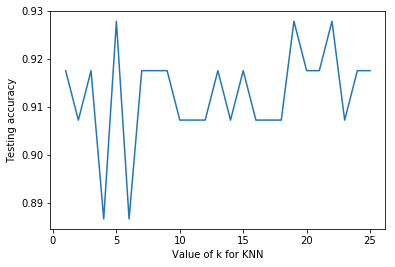

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(k_range, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing accuracy")

#### Accuracy Score (KNN)


In [41]:
# Let's choose k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_vector,y_train)
y_pred = knn.predict(test_vector)
metrics.accuracy_score(y_test,y_pred)

0.9278350515463918

#### Confusion Matrix (KNN)

In [42]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[ 9,  4],
       [ 3, 81]], dtype=int64)

### Logistic Regression Classfier 

In [43]:
# import and instantiate a Linear Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [44]:
# train the model using train_vector
%time logreg.fit(train_vector, y_train)

Wall time: 258 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred_class = logreg.predict(test_vector)

#### Accuracy score (Logistic Regression)

In [46]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.865979381443299

#### Confusion Matrix (Logistic regression)

In [48]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 0, 13],
       [ 0, 84]], dtype=int64)

### Part 3: Count Vectorizer for Feature Extraction


In [49]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000)

In [50]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)

In [51]:
# examine the document-term matrix
X_train_dtm

<291x270 sparse matrix of type '<class 'numpy.int64'>'
	with 12204 stored elements in Compressed Sparse Row format>

In [52]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<97x270 sparse matrix of type '<class 'numpy.int64'>'
	with 4212 stored elements in Compressed Sparse Row format>

### Naive Bayes Classifier

In [53]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [54]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 1.98 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

#### Accuracy Score (Naive Bayes)

In [56]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7319587628865979

#### Confusion Matrix (Naive Bayes)

In [57]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 9,  4],
       [22, 62]], dtype=int64)

### Logistic Regression Classifier 


In [58]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 30.9 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

#### Accuracy Score (Logistic Regression)


In [61]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.9381443298969072

#### Confusion Matrix (Logistic Regression)

In [63]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[10,  3],
       [ 3, 81]], dtype=int64)